In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

**The House Price Prediction Problem**

In [66]:
# read the csv file
data = pd.read_csv('wk3_kc_house_train_data.csv')

In [4]:
# setting the option to display all the columns
pd.set_option('display.max_columns', None)

In [3]:
# Looking into the data
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


1. Question the data

**These are the Hypothesis that have been made**

In [ ]:
# Zip- Code (implies location) plays an important role

# lat - long is an extension and gives precise location

# floors plays a key role ie., when compared with houses in the same location, the no of floors increase , the price increase

# yr_ renovated only when the yr_built is a while ago

# view, waterfront allure the buyers in rare events mostly occuring in high valued properties, most of the time they are secondary

# bed rooms +  sqft_living both weigh when we decide


# grade with which it is constructed plays a key role on the price

# Generally, For high price properties the diff between sqft_living and sqft_lot will be less


# Most of the time sqft_living = sqft_above + sqft_basement, so we can remove either the LHS or RHS

**grade with which it is constructed plays a key role on the price**

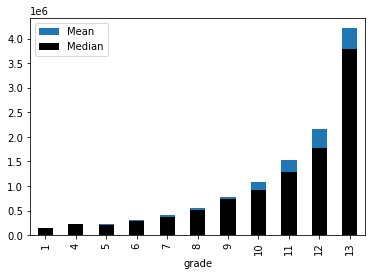

In [6]:
data.groupby('grade')['price'].mean().plot(kind ='bar', label = 'Mean')

data.groupby('grade')['price'].median().plot(kind ='bar', color = 'black', label = 'Median')

plt.legend()

plt.show()
# so we can conclude that a higher grade construction will lead to higher selling price

**Link between grades and no of houses sold**

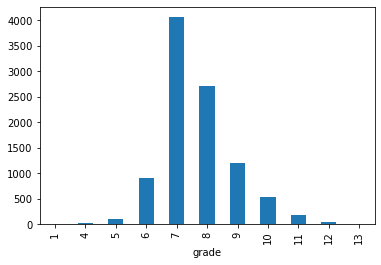

In [93]:
data.groupby('grade')['yr_built'].count().plot(kind = 'bar')

plt.show()

# Grade 7 and grade 8 are leading grades of houses sold

**Does high grade have lower no of renovations**

In [36]:
# no of houses that are having grades more than 1
# here grade 1 is sliced only for calculation purpose
data[data.grade !=1].groupby('grade')['yr_renovated'].count()

grade
4       17
5      107
6      914
7     4067
8     2707
9     1192
10     532
11     172
12      45
13       7
Name: yr_renovated, dtype: int64

In [27]:
# no of  houses that are renovated
# here we could see that the grade 1 is not present so hence removed in the previous step
data_copy = data[data.yr_renovated != 0].copy()

data_copy.groupby('grade')['yr_renovated'].count()

grade
4       1
5       3
6      46
7     154
8     120
9      61
10     27
11      7
13      2
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='grade'>

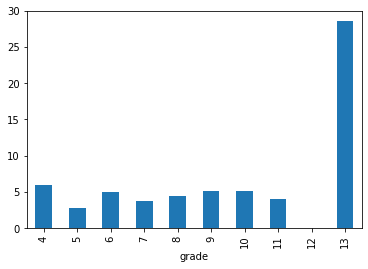

In [34]:
# slicing grade one as there is only one instance where  it is not renovated
data_groupby = data[data.grade !=1].groupby('grade')['yr_renovated'].count()

# taking into cosideration only the renovated spaces
data_copy = data[data.yr_renovated != 0].copy()

data_groupby_subset = data_copy.groupby('grade')['yr_renovated'].count()

final_data = (data_groupby_subset / data_groupby)*100

final_data.plot(kind = 'bar')

# here could see that nearly 30% of the 13-grade are being renovated, 
# this is odd as higher grade is should lead to lesser instances of renovation

**For high priced locations, sqft_basement will be less**

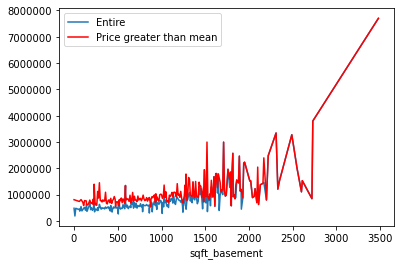

In [8]:
data.groupby('sqft_basement')['price'].mean().plot(kind = 'line', label = 'Entire')

# here the data is subsetted by taking on columns that are greater than mean

data_subset = data[data.price > data.price.mean()]

data_subset.groupby('sqft_basement')['price'].mean().plot(kind = 'line', color = 'red', label = 'Price greater than mean')


plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()

plt.show()

# with this plot we can see that by sqft_basement alone the price is not been affected


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

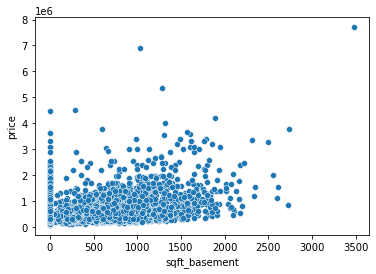

In [116]:
sns.scatterplot( x = data.sqft_basement, y = data.price)

# there isnt a strong corelation, but could see a general trend.

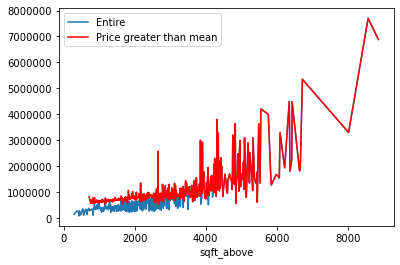

In [7]:
data.groupby('sqft_above')['price'].mean().plot(kind = 'line', label = 'Entire')

# here the data is subsetted by taking on columns that are greater than mean

data_subset = data[data.price > data.price.mean()]

data_subset.groupby('sqft_above')['price'].mean().plot(kind = 'line', color = 'red', label = 'Price greater than mean')

plt.ticklabel_format(useOffset=False, style='plain')

plt.legend()

plt.show()

# with this plot we can see that by sqft_above alone the price is not been affected
# also could see that a great variation in the prices


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

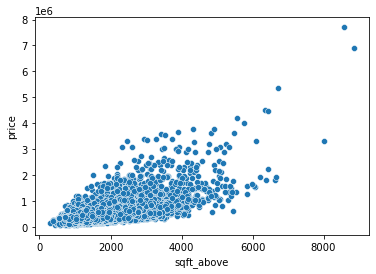

In [117]:
sns.scatterplot(x = data.sqft_above, y = data.price)

# here we could see a linear correlation between sqft_above and price

In [40]:
data_traversed = data[['price','sqft_above','sqft_basement','yr_built', 'yr_renovated']].copy()

In [47]:
data_traversed['diff_above_base'] = data_traversed.sqft_above - data_traversed.sqft_basement

<AxesSubplot:xlabel='diff_above_base', ylabel='price'>

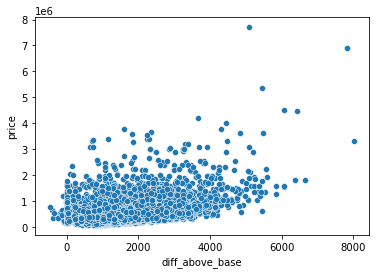

In [124]:
sns.scatterplot(x = data_traversed.diff_above_base,  y = data_traversed.price)

# here we could see that difference in above and basement is not dependent on the price
# here we can that there is no hard and fast rule about the basement is only for low or high prices houses
# but for further analysis, we add location into consideration as well.

**sqft_living = sqft_above + sqft_basement**

In [13]:
print(len(data_train['sqft_living']))
sum(data_train['sqft_living'] == data_train['sqft_above'] + data_train['sqft_basement'])

9761


9761

**yr_ renovated only when the yr_built is a while ago**

<AxesSubplot:xlabel='yr_built'>

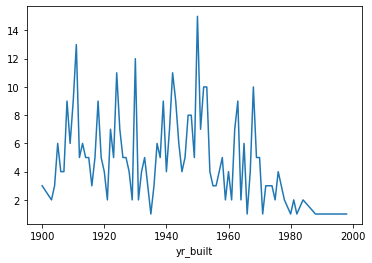

In [369]:
# here to check on a high level, houses that are renovated are only considered
# so the data frame subsetting is using yr_renovated not equal to zero
data_copy = data_train[data_train.yr_renovated != 0].copy()

data_copy.groupby('yr_built')['yr_renovated'].count().plot(kind = 'line')

# From the plot we can see that there is no correlation between yr_renovated and yr_built
# It may be because only one entry is given to yr_renovated, we can say that only the latest renovation is provided.
# so, as per the data we cant conclude, the year of renovation has no dependence on year built

**yr_ sold have an influence on  yr_ renovated**

In [54]:
data_traversed['yr_sold'] = data.date.apply(lambda x: x[0:4])

data_traversed['yr_sold'] = data_traversed['yr_sold'].astype('int')

<AxesSubplot:xlabel='yr_sold'>

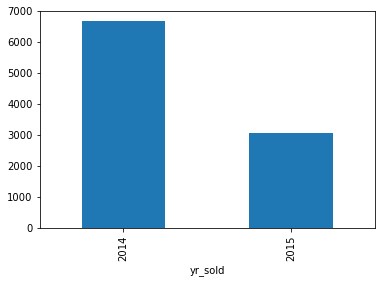

In [55]:
# this is hard to contemplate the hypothesis from the given data as the houses are only - 2015 and 2016 sold
# without the data from the other years it is hard to prove this hypothesis.

data_traversed.groupby('yr_sold')['yr_built'].count().plot(kind = 'bar')

**Zip- Code (implies location) plays an important role**

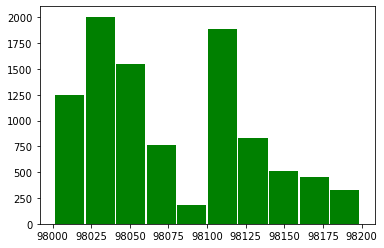

In [56]:
plt.bar(data.zipcode, rwidth= 0.95, color= 'green')

plt.show()

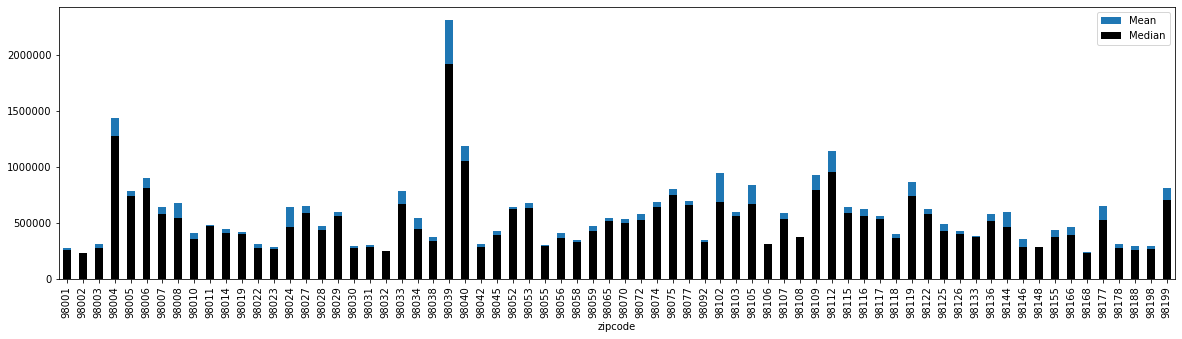

In [94]:
plt.figure(figsize=(20,5))

plt.ticklabel_format(useOffset=False, style='plain')

data.groupby('zipcode')['price'].mean().plot(kind = 'bar', label = 'Mean')

data.groupby('zipcode')['price'].median().plot(kind = 'bar', color = 'black', label = 'Median')

plt.legend()

plt.show()

# the average price per zip codes are mostly uniformly spread
# there is a zipcode that is costly - 98039

**Check whether the high performing zipcodes belong to the same place**

In [32]:
# as part of this analysis an extrernal data set is being used
data_zip = pd.read_csv('wa-zip-code-latitude-and-longitude.csv', sep= ';')

In [33]:
data_zip

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,98228,Bellingham,WA,48.814753,-121.988548,-8,1,"48.814753,-121.988548"
1,98235,Clearlake,WA,48.461672,-122.233080,-8,1,"48.461672,-122.23308"
2,98244,Deming,WA,48.841442,-122.125470,-8,1,"48.841442,-122.12547"
3,98908,Yakima,WA,46.605303,-120.617620,-8,1,"46.605303,-120.61762"
4,98126,Seattle,WA,47.546870,-122.374800,-8,1,"47.54687,-122.3748"
...,...,...,...,...,...,...,...,...
732,99338,Kennewick,WA,46.192356,-119.239820,-8,1,"46.192356,-119.23982"
733,98953,Zillah,WA,46.418933,-120.266990,-8,1,"46.418933,-120.26699"
734,98373,Puyallup,WA,47.147862,-122.318640,-8,1,"47.147862,-122.31864"
735,98509,Lacey,WA,46.978118,-122.702393,-8,1,"46.978118,-122.702393"


In [34]:
# a function is being defined to map the zip code with city
# 98077 is not present in the zip code data, so it is being hardcoded
def zip_to_city(x):
    
    data_zip = pd.read_csv('wa-zip-code-latitude-and-longitude.csv', sep= ';')
    
    city_name = 'None'
    
    if sum(data_zip.Zip == x) == 1:
        
        city_name = data_zip[data_zip.Zip == x].iloc[0,1]
    elif x == 98077:
        city_name = 'Woodinville'
    
    return city_name
    

In [35]:
# using the apply function to apply it on each row
data['city'] = data.zipcode.apply(zip_to_city)

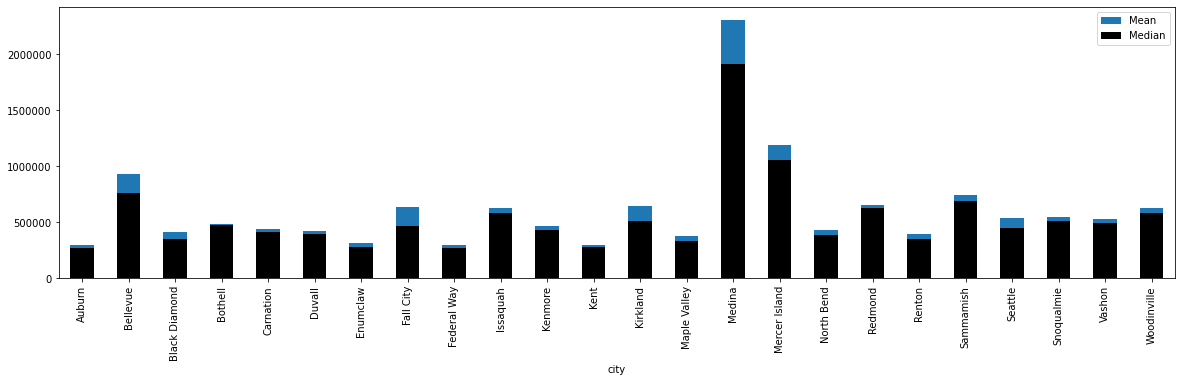

In [12]:
data_groupby_city_price_mean = data.groupby('city')['price'].mean()

plt.figure(figsize=(20,5))

plt.ticklabel_format(useOffset=False, style='plain')

data.groupby('city')['price'].mean().plot(kind = 'bar',  label = 'Mean')

data.groupby('city')['price'].median().plot(kind = 'bar', color = 'black',  label = 'Median')

plt.legend()

plt.show()

# here we could see that Median and Mercer Island Have high average price 
# mean of most of the cities is uniform
# median of medina is away from the mean, which may be influenced by an extemes

**No of high priced houses in each city**

<AxesSubplot:xlabel='city'>

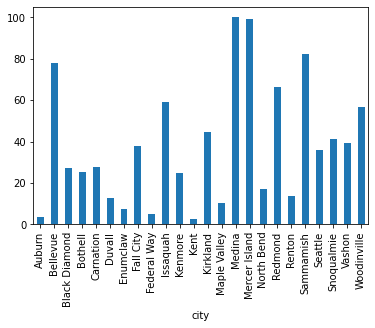

In [65]:
data_subset = data[data.price > data.price.mean()]

data_groupby_subset = data_subset.groupby('city')['zipcode'].count() 

data_groupby = data.groupby('city')['price'].count()

final_data = (data_groupby_subset / data_groupby)*100

final_data.plot(kind = 'bar')

# could see that Median, Mercer Islands and Bellevue cities have high no of houses with more than average sale price

**sqft_living15 relation with price**

In [16]:
data_traversed_area = data[['price','sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']].copy()

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

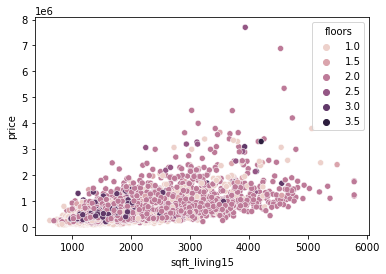

In [17]:
sns.scatterplot(x = data_traversed_area.sqft_living15, y = data_traversed_area.price,hue = data.floors)

# couldnt see a positive relation
# could see that the floors of 3 and more at lower price and lower sqft_living

**What if the house size (living space) is more than the average (living space for nearest 15), will it influence the price**

In [113]:
data_traversed_area['diff_liv_and_liv15'] = data_traversed_area.sqft_living - data_traversed_area.sqft_living15

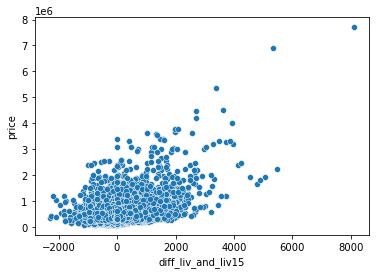

In [125]:
sns.scatterplot(x = data_traversed_area.diff_liv_and_liv15, y =  data_traversed_area.price)

plt.show()

# there is no direct trend, ie., 
# if a house is having more than the average living space, that is not influencing the price

**sqft_lot15 relation with price**

In [137]:
data_traversed_area.sqft_lot15.describe()

count      9761.000000
mean      12824.785165
std       26518.337402
min         660.000000
25%        5160.000000
50%        7660.000000
75%       10113.000000
max      560617.000000
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

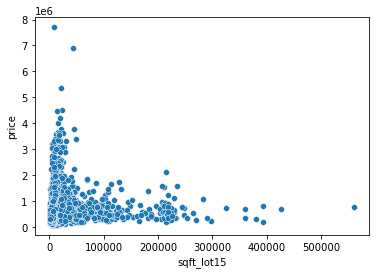

In [121]:
sns.scatterplot(x = data_traversed_area.sqft_lot15, y = data_traversed_area.price)

In [126]:
data_traversed_area['diff_lot_and_lot15'] = data_traversed_area.sqft_lot - data_traversed_area.sqft_lot15

<AxesSubplot:xlabel='diff_lot_and_lot15', ylabel='price'>

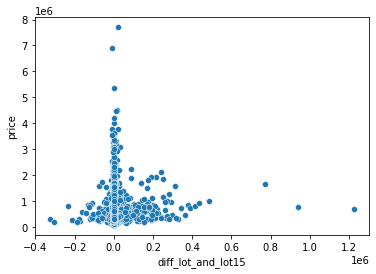

In [203]:
sns.scatterplot(x = data_traversed_area.diff_lot_and_lot15, y = data_traversed_area.price)

# here we could that there is a high range of prices, when the difference is zero.

<AxesSubplot:>

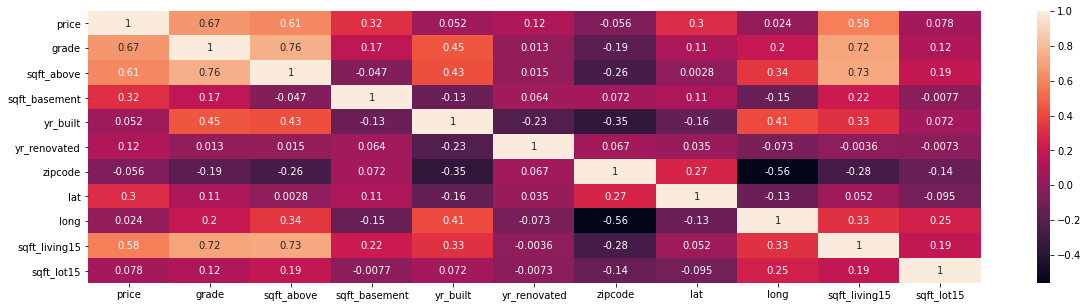

In [82]:
plt.figure(figsize=(20,5))
sns.heatmap(data[['price','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].corr(), annot= True)


# Grade , sqft_above,sqft_living15 have high impact on price

In [146]:
data_traversed_area[['sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']].std()

# here could see a high standard deviation sqft_lot and sqft_lot15

sqft_living        927.194303
sqft_lot         41266.734598
sqft_living15      687.322247
sqft_lot15       26518.337402
dtype: float64